# Tutorial 1

In this tutorial we show how an elastic sea level fingerprint can be calculated using the library. The discussion here is deliberately brief, with the intention of getting to the results as quickly as possible. Later tutorials will explore the ideas in further detail and illustrate added functionality. 

### Step1 -- Setting up the fingerprint object

The first step is to create an instance of the ```FingerPrint``` class. By default, calculations are done using spherical harmonic expansions up to degree 256 and using Love numbers pre-calculated for PREM of Dziewonski & Anderson (1981). 

In [ ]:
import matplotlib.pyplot as plt
from pyslfp import FingerPrint

# Construct the FingerPrint object using default parameters. 
fingerprint = FingerPrint()

### Step 2 -- Selecting the background sea level and ice models

To peform calculations, we need to set the initial values for the sea level and ice thickness. Here this is done using a class method that reads in the present-day values for these fields from the ```ice-7G``` model produced by Peltier's group. 

In [2]:
# Set the background state using ice-7g present-day values. 
fingerprint.set_state_from_ice_ng()

Now that the background state is set, we can make plots of the initial sea level and ice thickness. 

/tmp/ipykernel_24514/2076254780.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/tmp/ipykernel_24514/2076254780.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


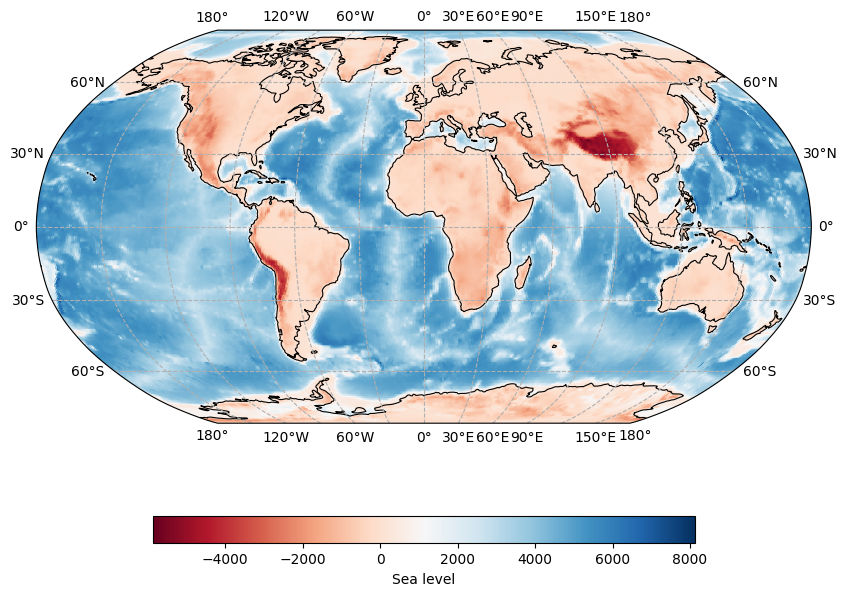

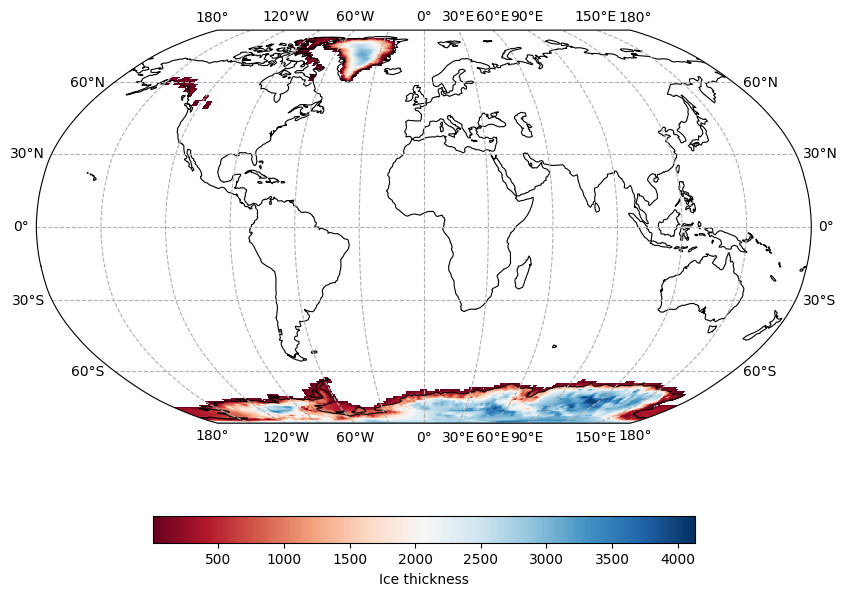

In [ ]:
# Plot the sea level.
fingerprint.plot(fingerprint.sea_level, colorbar=True, cbar_label="Sea level")

# Plot the ice sheet thickness.
fingerprint.plot(fingerprint.ice_thickness, colorbar=True, cbar_label="Ice thickness", ice_projection=True)
plt.show()


### Step 3 -- Choose a direct load. 

For the fingerprint calculation, we need to specify the direct load. Here we melt all ice in the southern hemisphere. 

/tmp/ipykernel_24514/2008903825.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


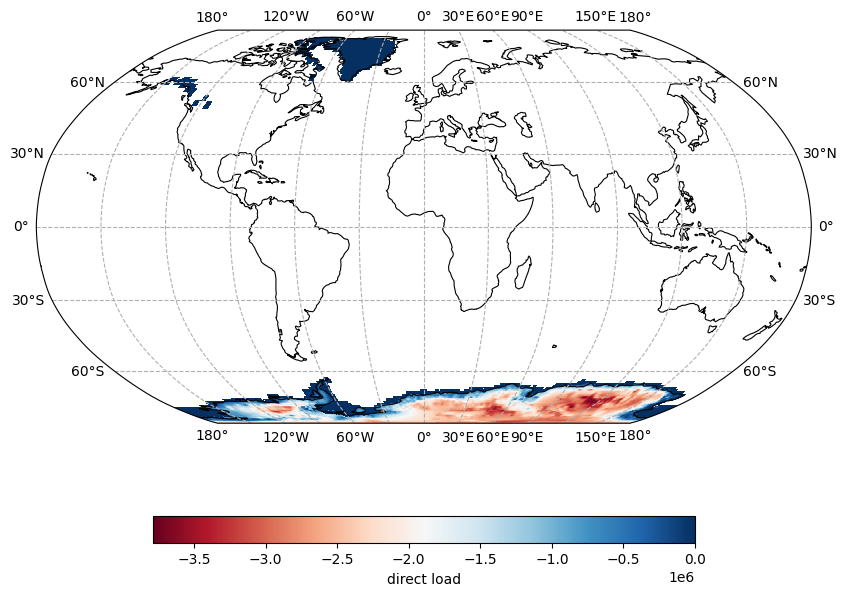

In [4]:
# Set the direct load. 
direct_load = fingerprint.southern_hemisphere_load()

# Plot the direct load. 
fig3, cbar3 = fingerprint.plot(direct_load, colorbar=True, cbar_label="direct load", ice_projection=True)
fig3.show()

### Step 4 -- Solve the sea level equation

Finally, we can use the call method for the ```FingerPrint``` class to return the sea level change and plot the results. Note that this method also returns additional variables that are ignored in this case. By setting the ```verbose``` method to ```True``` when solving the sea level equation, we see that the relative error at each iteration is printed to the screen. This also shows that plotting the solutions usually takes more time than calculating them!


Iteration = 1, relative error = 4.6642e-02
Iteration = 2, relative error = 2.6802e-03
Iteration = 3, relative error = 3.4886e-04
Iteration = 4, relative error = 5.8341e-05
Iteration = 5, relative error = 1.0724e-05
Iteration = 6, relative error = 2.0840e-06
Iteration = 7, relative error = 4.1979e-07


/tmp/ipykernel_24514/1316892906.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()
/tmp/ipykernel_24514/1316892906.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig5.show()


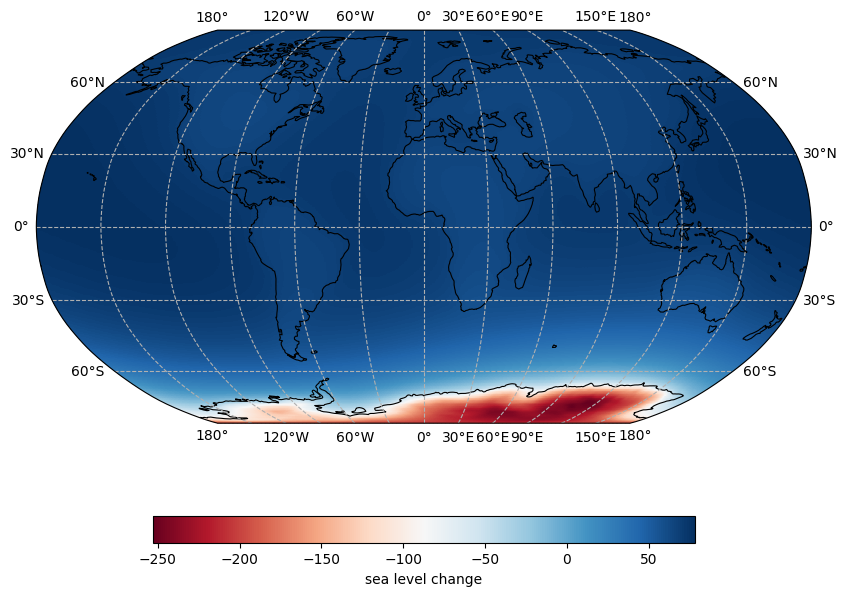

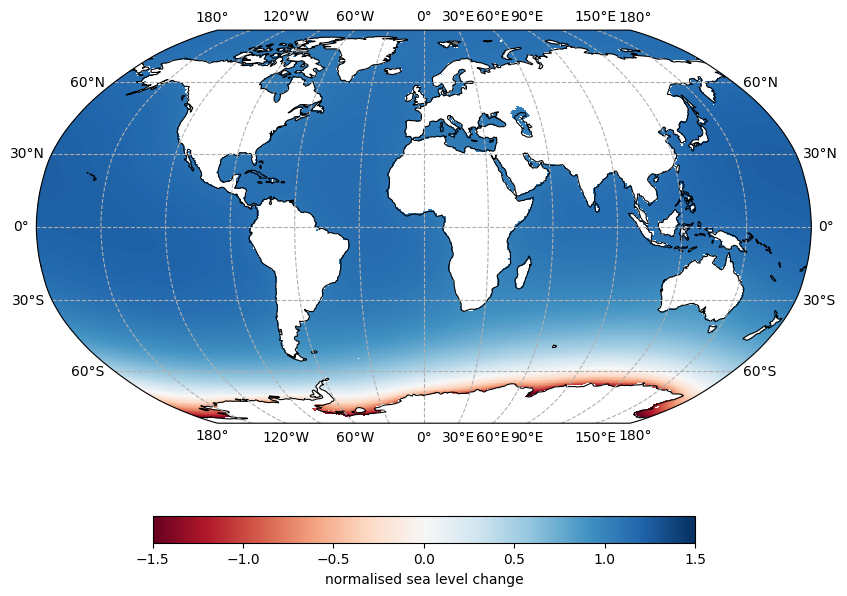

In [5]:
# Solve the sea level equation. 
sea_level_change, _, _, _ = fingerprint(direct_load=direct_load, verbose=True)

# Plot the solution globally
fig4, cbar4 = fingerprint.plot(sea_level_change, colorbar=True, cbar_label="sea level change")
fig4.show()

# Plot the solution in the oceans only, and normalised by the mean sea level change. 
mean_sea_level_change = fingerprint.mean_sea_level_change(direct_load)
fig5, cbar5 = fingerprint.plot(sea_level_change/mean_sea_level_change,
                               colorbar=True, cbar_label="normalised sea level change", 
                               ocean_projection=True, vmin = -1.5, vmax=1.5)
fig5.show()
